In [1]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import pickle
import matplotlib.pyplot as plt

In [2]:
# Function to extract features from audio files
def extract_features(file_path):
    y, sr = librosa.load(file_path, duration=40)  # Load 40 seconds of the audio
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
    tempogram = librosa.feature.tempogram(y=y, sr=sr)
    
    features = np.hstack((mfccs.mean(axis=1), spectral_centroid.mean(), tempogram.mean(axis=1)))
    return features

In [3]:
# Directory containing audio files for different genres
data_dir = "D:\\IIIT A course\\IML\\Project\\archive\\genrenew"
genres = ["bollypop", "carnatic", "ghazal", "semiclassical", "sufi"]

In [4]:
# Prepare features and labels
features = []
labels = []

In [5]:
for genre_label, genre in enumerate(genres):
    genre_dir = os.path.join(data_dir, genre)
    for filename in os.listdir(genre_dir):
        file_path = os.path.join(genre_dir, filename)
        try:
            extracted_features = extract_features(file_path)
            features.append(extracted_features)
            labels.append(genre_label)
        except Exception as e:
            print(f"Error processing {file_path}: {e}")

In [6]:
# Convert lists to numpy arrays
features = np.array(features)
labels = np.array(labels)

In [7]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.20, random_state=42)

In [8]:
def show_confusion_matrix(name, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {name}:\n{cm}")

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for {name}")
    plt.colorbar()
    tick_marks = np.arange(len(genres))
    plt.xticks(tick_marks, genres, rotation=45)
    plt.yticks(tick_marks, genres)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.tight_layout()
    plt.show()

In [9]:
# Initialize and train the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
# Make predictions
rf_predictions = rf_clf.predict(X_test)

In [11]:
# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_report = classification_report(y_test, rf_predictions, target_names=genres)

In [12]:
# Print evaluation metrics
print(f"Accuracy: {rf_accuracy}")
print("Classification Report:")
print(rf_report)

Accuracy: 0.71
Classification Report:
               precision    recall  f1-score   support

     bollypop       0.69      0.79      0.73        28
     carnatic       0.75      0.86      0.80        14
       ghazal       1.00      0.90      0.95        10
semiclassical       0.65      0.46      0.54        24
         sufi       0.65      0.71      0.68        24

     accuracy                           0.71       100
    macro avg       0.75      0.74      0.74       100
 weighted avg       0.71      0.71      0.70       100



Confusion Matrix for Random Forest:
[[22  1  0  2  3]
 [ 0 12  0  0  2]
 [ 1  0  9  0  0]
 [ 7  2  0 11  4]
 [ 2  1  0  4 17]]


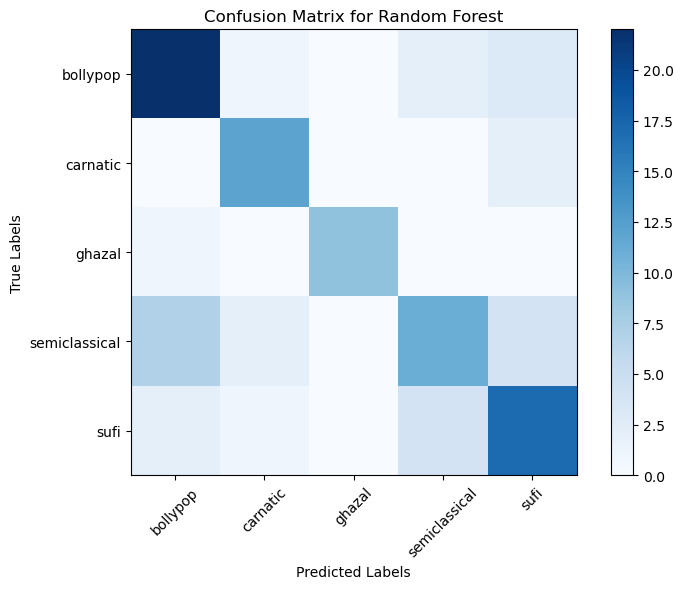

In [13]:
show_confusion_matrix("Random Forest", rf_predictions)

In [14]:
# Initialising dictionary to store accuracy of n neigbours
knn_accuracy_scores = {}

for i in range(3,20,2):
    # Initialize and train the classifier - KNeighborsClassifier
    knn_clf = KNeighborsClassifier(n_neighbors=i)
    knn_clf.fit(X_train, y_train)

    # Make predictions
    knn_predictions = knn_clf.predict(X_test)

    # Evaluate the model
    knn_accuracy = accuracy_score(y_test, knn_predictions)
    knn_report = classification_report(y_test, knn_predictions, target_names=genres)
    knn_accuracy_scores[knn_accuracy]=(knn_report, knn_predictions)

In [15]:
print(*knn_accuracy_scores)

0.46 0.47 0.44 0.41 0.39 0.45


In [16]:
# Print evaluation metrics
print(f"Accuracy: {max(knn_accuracy_scores)}")
print("Classification Report:")
print(knn_accuracy_scores[max(knn_accuracy_scores)][0])

Accuracy: 0.47
Classification Report:
               precision    recall  f1-score   support

     bollypop       0.41      0.50      0.45        28
     carnatic       0.71      0.71      0.71        14
       ghazal       0.42      1.00      0.59        10
semiclassical       0.54      0.29      0.38        24
         sufi       0.40      0.25      0.31        24

     accuracy                           0.47       100
    macro avg       0.50      0.55      0.49       100
 weighted avg       0.48      0.47      0.45       100



Confusion Matrix for KNN:
[[14  1  4  2  7]
 [ 2 10  2  0  0]
 [ 0  0 10  0  0]
 [ 8  2  5  7  2]
 [10  1  3  4  6]]


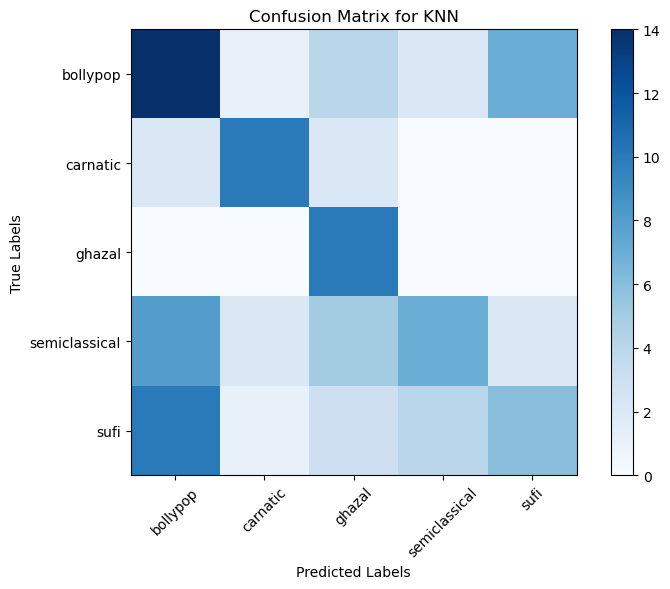

In [17]:
show_confusion_matrix("KNN", knn_accuracy_scores[max(knn_accuracy_scores)][1])

In [18]:
# Initialize and train the classifiers Logistic regression
logistic_reg = LogisticRegression(max_iter=4500, random_state=42)
logistic_reg.fit(X_train, y_train)

D:\Programs\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=4500, random_state=42)

In [19]:
 # Make predictions
logistic_predictions = logistic_reg.predict(X_test)

# Evaluate Logistic Regression classifier
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
logistic_report = classification_report(y_test, logistic_predictions, target_names=genres)

In [20]:
print("\nLogistic Regression Classifier Metrics:")
print(f"Accuracy: {logistic_accuracy}")
print("Classification Report:")
print(logistic_report)


Logistic Regression Classifier Metrics:
Accuracy: 0.71
Classification Report:
               precision    recall  f1-score   support

     bollypop       0.78      0.75      0.76        28
     carnatic       0.69      0.64      0.67        14
       ghazal       0.82      0.90      0.86        10
semiclassical       0.61      0.46      0.52        24
         sufi       0.68      0.88      0.76        24

     accuracy                           0.71       100
    macro avg       0.72      0.73      0.71       100
 weighted avg       0.71      0.71      0.70       100



Confusion Matrix for Logistic Regression:
[[21  1  0  5  1]
 [ 0  9  1  1  3]
 [ 0  1  9  0  0]
 [ 5  2  0 11  6]
 [ 1  0  1  1 21]]


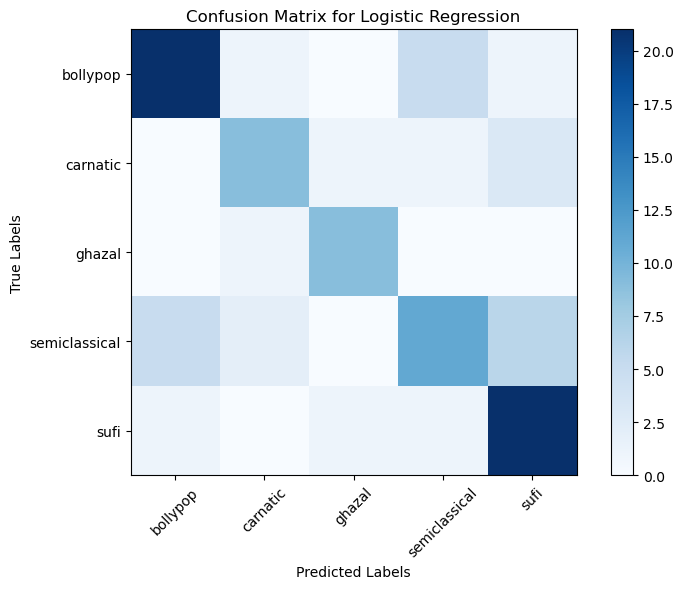

In [21]:
show_confusion_matrix("Logistic Regression", logistic_predictions)

In [22]:
# Initialize and train the classifiers - SVM
svm_clf = SVC(kernel='rbf', random_state=42)
svm_clf.fit(X_train, y_train)

SVC(random_state=42)

In [23]:
 # Make predictions
svm_predictions = svm_clf.predict(X_test)

In [24]:
# Evaluate SVM classifier
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_report = classification_report(y_test, svm_predictions, target_names=genres)

In [25]:
print("\nSVM Classifier Metrics:")
print(f"Accuracy: {svm_accuracy}")
print("Classification Report:")
print(svm_report)


SVM Classifier Metrics:
Accuracy: 0.25
Classification Report:
               precision    recall  f1-score   support

     bollypop       0.57      0.14      0.23        28
     carnatic       0.38      0.21      0.27        14
       ghazal       0.19      1.00      0.31        10
semiclassical       0.36      0.17      0.23        24
         sufi       0.20      0.17      0.18        24

     accuracy                           0.25       100
    macro avg       0.34      0.34      0.24       100
 weighted avg       0.37      0.25      0.23       100



Confusion Matrix for SVM:
[[ 4  1 14  1  8]
 [ 0  3  9  0  2]
 [ 0  0 10  0  0]
 [ 1  3 10  4  6]
 [ 2  1 11  6  4]]


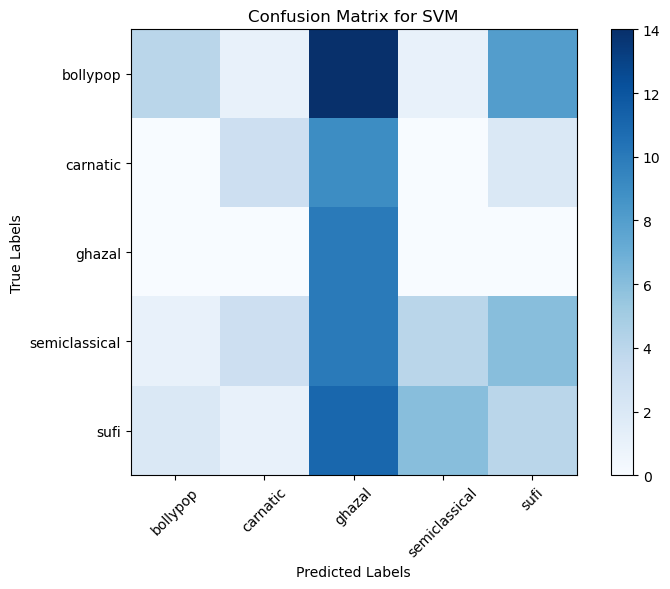

In [26]:
show_confusion_matrix("SVM", svm_predictions)

In [27]:
# Initialize and train the classifiers - Decision Tree
decision_tree_clf = DecisionTreeClassifier(max_depth=5, min_samples_split=5, criterion="entropy", random_state=42)
decision_tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=5,
                       random_state=42)

In [28]:
# Make Predictions
decision_tree_predictions = decision_tree_clf.predict(X_test)

In [29]:
# Evaluate Decision Tree classifier
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
decision_tree_report = classification_report(y_test, decision_tree_predictions, target_names=genres)

In [30]:
print("\nDecision Tree Classifier Metrics:")
print(f"Accuracy: {decision_tree_accuracy}")
print("Classification Report:")
print(decision_tree_report)


Decision Tree Classifier Metrics:
Accuracy: 0.61
Classification Report:
               precision    recall  f1-score   support

     bollypop       0.55      0.61      0.58        28
     carnatic       0.73      0.79      0.76        14
       ghazal       0.67      0.80      0.73        10
semiclassical       0.50      0.29      0.37        24
         sufi       0.64      0.75      0.69        24

     accuracy                           0.61       100
    macro avg       0.62      0.65      0.62       100
 weighted avg       0.60      0.61      0.59       100



Confusion Matrix for Decision Tree:
[[17  1  2  4  4]
 [ 0 11  0  2  1]
 [ 0  0  8  0  2]
 [10  3  1  7  3]
 [ 4  0  1  1 18]]


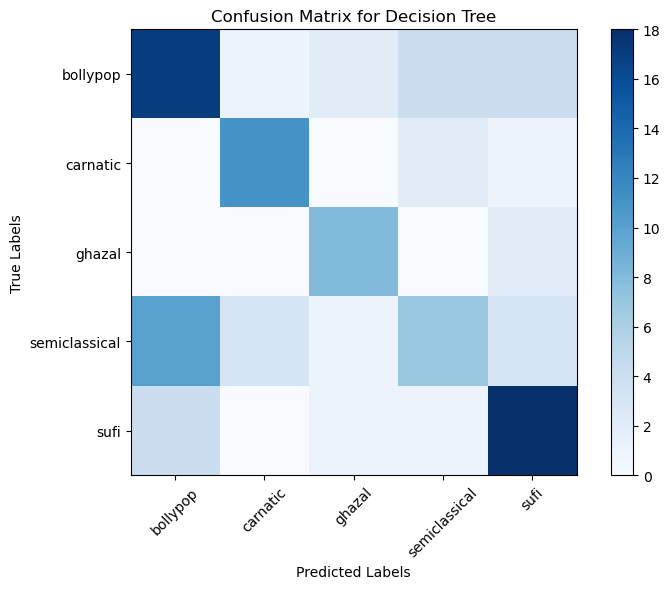

In [31]:
show_confusion_matrix("Decision Tree", decision_tree_predictions)

In [32]:
classifiers = [
    ("Random Forest", rf_clf),
    ("KNN", knn_clf),
    ("Logistic Regression", logistic_reg),
    ("SVM", svm_clf),
    ("Decision Tree", decision_tree_clf)
]

In [33]:
# Apply k-fold cross-validation for each classifier
for clf_name, clf in classifiers:
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(clf, features, labels, cv=kfold)
    print(f"{clf_name} Cross-Validation Accuracy: {np.mean(scores)}")

Random Forest Cross-Validation Accuracy: 0.716
KNN Cross-Validation Accuracy: 0.43200000000000005


D:\Programs\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Programs\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Logistic Regression Cross-Validation Accuracy: 0.6679999999999999
SVM Cross-Validation Accuracy: 0.246
Decision Tree Cross-Validation Accuracy: 0.584


In [34]:
# Using the most accurate model
model = rf_clf
model_name = "random_forest"

In [35]:
# Training model on entire data before exporting
model.fit(features, labels)

RandomForestClassifier(random_state=42)

In [36]:
# Export the most accurate model
model_filename = model_name+"_model.pkl"
with open(model_filename, 'wb') as file:
    pickle.dump(rf_clf, file)